### Movielens

Here, we are asked to perform the analysis using the Exploratory Data Analysis technique. We need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

In [46]:
#importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()


In [47]:
#lets just ignore unwanted warnings

import warnings
warnings.filterwarnings('ignore')

-------------------------------

### Importing files


In [48]:
moviesdata = pd.read_csv("movies.dat",sep="::",header=None)

In [49]:
moviesdata.columns = ["MovieID","Title","Genres"]

In [50]:
moviesdata.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
ratingsdata = pd.read_csv("ratings.dat",sep="::",header=None)

In [52]:
ratingsdata.columns = ["UserID","MovieID","Rating","Timestamp"]

In [53]:
ratingsdata.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [54]:
userdata = pd.read_csv("users.dat",sep="::",header=None)

In [55]:
userdata.columns = ["UserID","Gender","Age","Occupation","Zip-code"]

In [56]:
userdata.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [57]:
movies_ratings=pd.merge(left=moviesdata, right=ratingsdata, how="inner", on = "MovieID")

In [58]:
movies_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [59]:
Master_Movie_Data = pd.merge(left=movies_ratings,right=userdata,how="inner",on= "UserID")

In [60]:
Master_Movie_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [61]:
Master_Movie_Data.shape

(1000209, 10)

In [62]:
Master_Movie_Data.isnull().any()

MovieID       False
Title         False
Genres        False
UserID        False
Rating        False
Timestamp     False
Gender        False
Age           False
Occupation    False
Zip-code      False
dtype: bool

Glad we dont have any null values in our data

-----------------------------------------

In [63]:
Master_Movie_Data["UserID"].value_counts()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64

In [64]:
Master_Movie_Data["UserID"].value_counts().min()

20

So we see that there are 6040 users and each of them have done atleast 20 ratings.

In [65]:
Master_Movie_Data["Gender"].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

Out of the total 1000209 data, 753769 comes from Males and 246440 comes from Females.

In [66]:
Master_Movie_Data["Occupation"].value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

Occupation wise, we have categoty 4 that is college/grad student as the highest and categoty 8 that is farmer being the lowest contribution to our data.

### 1.User Age Distribution


In [67]:
Master_Movie_Data["Age"].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [68]:
Master_Movie_Data["Age"].median()

25.0

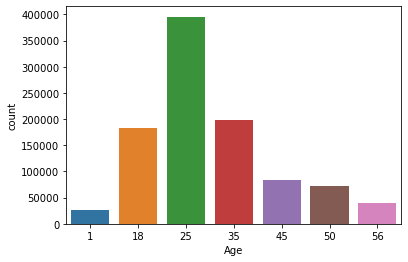

In [69]:
sns.countplot(Master_Movie_Data["Age"])
plt.savefig('agedistribution1.png')

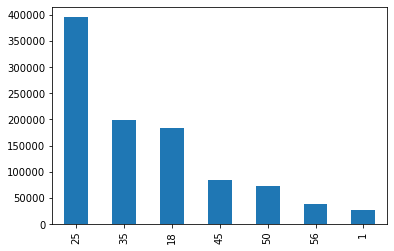

In [70]:
Master_Movie_Data["Age"].value_counts().plot(kind="bar")
plt.savefig('agedistribution2.png')

So we see categoty 25 that is age group 25-34 are the highest and category 1 that is age group Under 18 are the lowest.

## 2.User rating of the movie “Toy Story”

In [71]:
Toystoryrating = Master_Movie_Data.loc[Master_Movie_Data.Title=="Toy Story (1995)",["Rating"]]
Toystoryrating["Rating"].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [72]:
Toystoryrating["Rating"].median()

4.0

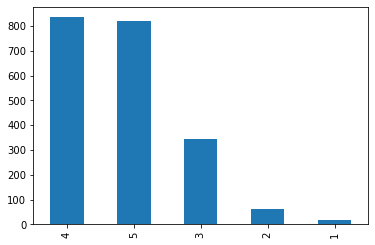

In [73]:
Toystoryrating["Rating"].value_counts().plot(kind="bar")
plt.savefig('Toystoryrating.png')

Most viewers have rated the movie Toy story as 4 and almost equal amount of viewers have given it a 5

## 3.Top 25 movies by viewership rating


In [74]:
most_rated = Master_Movie_Data.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

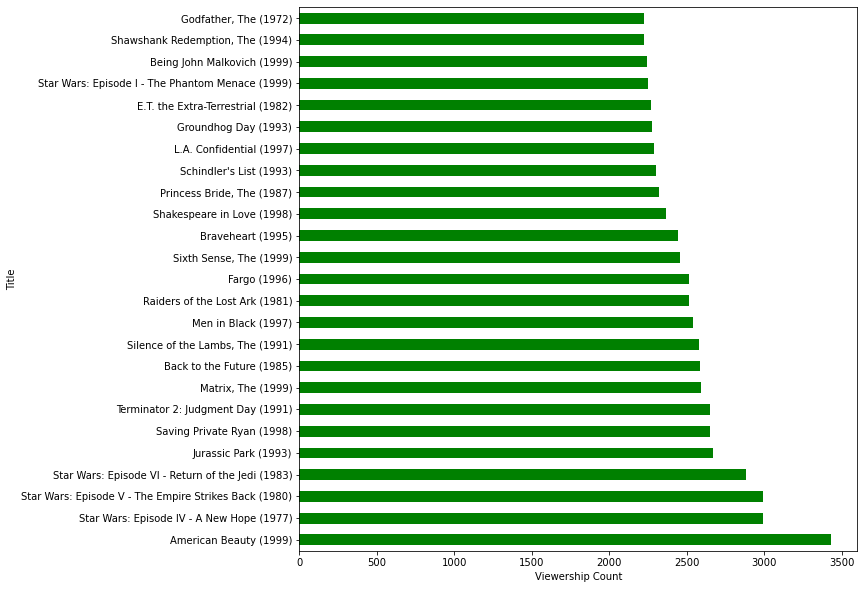

In [75]:
most_rated.plot(kind="barh",figsize=(10,10),color="green")
plt.ylabel("Title")
plt.xlabel("Viewership Count")
plt.savefig('top25viewership.png')

From the given dataset we see that American beauty has got most views and followed by Star wars episode IV- A new hope.

## 4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [76]:
userrating = Master_Movie_Data.loc[Master_Movie_Data.UserID== 2696,["Title","Rating"]]
userrating

,Title,Rating
991035,"Client, The (1994)",3
991036,Lone Star (1996),5
991037,Basic Instinct (1992),4
991038,E.T. the Extra-Terrestrial (1982),3
991039,"Shining, The (1980)",4
991040,Back to the Future (1985),2
991041,Cop Land (1997),3
991042,L.A. Confidential (1997),4
991043,"Game, The (1997)",4
991044,I Know What You Did Last Summer (1997),2


In [77]:
groupedrating=userrating.groupby("Rating").size()
groupedrating

Rating
1     2
2     3
3     3
4    11
5     1
dtype: int64

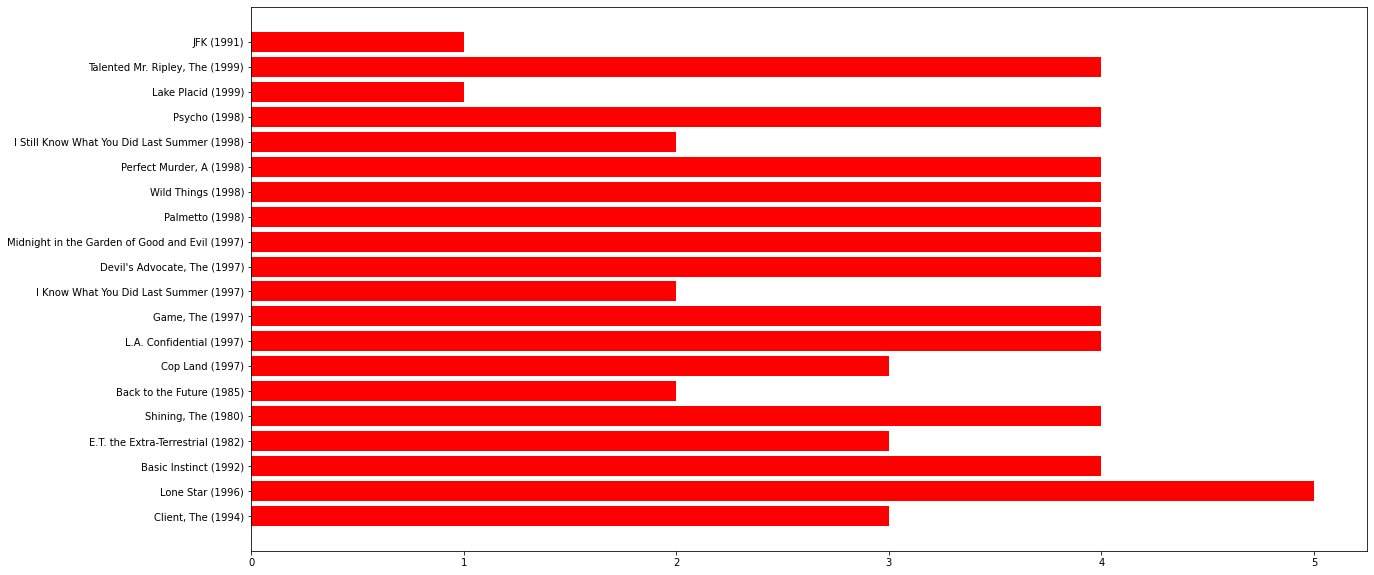

In [78]:
plt.figure(figsize=(20,10))
plt.barh(userrating.Title,userrating.Rating,color="red")
plt.savefig('ratingsuser2696.png')

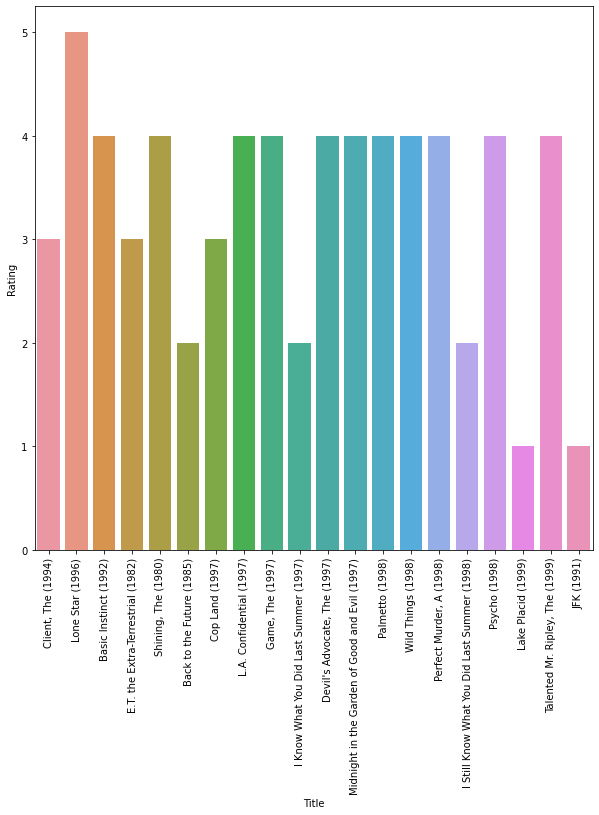

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(userrating.Title,userrating.Rating)
plt.xticks(rotation=90)
plt.savefig('user2696ratings.png')

User 2696 has rated 20 movies 
  - only movie with rating 5 is Lone star 
  - JFK and Lake Pacid have got the lowest rating
  

-------------------------------

### Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)


In [80]:
Master_Movie_Data["Genres"].unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [81]:
val = Master_Movie_Data.Genres.str.split("|")

uniquegenres = []
for v in val:
    for i in v:
        if i not in uniquegenres:
            uniquegenres.append(i)



In [82]:
uniquegenres

['Animation',
 "Children's",
 'Comedy',
 'Musical',
 'Romance',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Crime',
 'Thriller',
 'Western',
 'Horror',
 'Mystery',
 'Documentary',
 'Film-Noir']

------------------------------

## Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 


In [83]:
#deep copying the masterdataset
Genredata=Master_Movie_Data.copy(deep=True)
Genredata.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [84]:
#creating a new dataset with seperate column for each category with 1 or 0 representing the genre of a movie

MasterGenre = Genredata.join(Genredata.pop("Genres").str.get_dummies("|"))

In [85]:
#dropping unwanted columns from this dataset

MasterGenre=MasterGenre.drop(["UserID","Occupation","Zip-code","Timestamp","MovieID","Rating","Age","Gender"],axis=1)

In [86]:
MasterGenre.head()

,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pocahontas (1995),0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Apollo 13 (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Star Wars: Episode IV - A New Hope (1977),1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,Schindler's List (1993),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


------------------------

## Determine the features affecting the ratings of any particular movie.


In [87]:
Master_Movie_Data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [88]:
Master_Movie_Data[["Rating","Age"]].corr()

,Rating,Age
Rating,1.000000,0.056869
Age,0.056869,1.000000


In [89]:
Master_Movie_Data[["Rating","Occupation"]].corr()

,Rating,Occupation
Rating,1.000000,0.006753
Occupation,0.006753,1.000000


In [91]:
Master_Movie_Data.Gender = label.fit_transform(Master_Movie_Data["Gender"].astype("str"))


In [95]:
Master_Movie_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  int32 
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int32(1), int64(6), object(3)
memory usage: 80.1+ MB


In [96]:
Master_Movie_Data[["Rating","Gender"]].corr()

,Rating,Gender
Rating,1.000000,-0.019861
Gender,-0.019861,1.000000


In [97]:
Master_Movie_Data[["Rating","MovieID"]].corr()

,Rating,MovieID
Rating,1.000000,-0.064042
MovieID,-0.064042,1.000000



We would be using Age,Gender,MovieID,and Genres to create a model predicting movie ratings.

------------------------------

## Develop an appropriate model to predict the movie ratings


In [98]:
Master_Movie_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,0,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,0,1,10,48067


In [99]:
#creating a new deep copy dataset of the mastermoviedata for analysis

moviedataanalysis=Master_Movie_Data.copy(deep=True)
moviedataanalysis.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,0,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,0,1,10,48067


In [100]:
#creating a new dataset with seperate column for each category with 1 or 0 representing the genre of a movie


Masterdataanalysis = moviedataanalysis.join(moviedataanalysis.pop("Genres").str.get_dummies("|"))
Masterdataanalysis

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,978824351,0,1,10,48067,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,978301777,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,0,1,10,48067,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,978824195,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,4,958489970,1,25,4,92843,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),5727,2,958489970,1,25,4,92843,0,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),5727,5,958489902,1,25,4,92843,0,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),5727,3,958490699,1,25,4,92843,1,...,0,0,0,0,0,0,0,1,0,0


In [101]:
Masterdataanalysis = Masterdataanalysis.drop(["Timestamp","Zip-code",'Title',"UserID","Occupation"],axis=1)

In [102]:
Masterdataanalysis

,MovieID,Rating,Gender,Age,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,5,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,48,5,0,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,150,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,4,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,527,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,4,1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,2,1,25,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,5,1,25,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,3,1,25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
#importing few functions from sklearn

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 



In [104]:
#Dividing the data into X without ratings and y only ratings

X = Masterdataanalysis[Masterdataanalysis.columns[~Masterdataanalysis.columns.isin(["Rating"])]]
y = Masterdataanalysis.Rating

In [106]:
#Ratings as int and gender as string

X.Gender = label.fit_transform(X["Gender"].astype("str"))
X.Gender = label.fit_transform(X["Gender"].astype("str"))
y = label.fit_transform(y.astype("int"))
y = label.fit_transform(y.astype("int"))

In [107]:
#creating X and y train and test data from X and y

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)





# Prediction Models

In [126]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier


# Create a k-NN classifier with 7 neighbors: knn
movie_knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
movie_knn.fit(X_train,y_train)

knny_pred = movie_knn.predict(X_test)
# Print the accuracy
print(movie_knn.score(X_test, y_test))
knnscore = metrics.accuracy_score(y_test, knny_pred)

0.34594735105627816


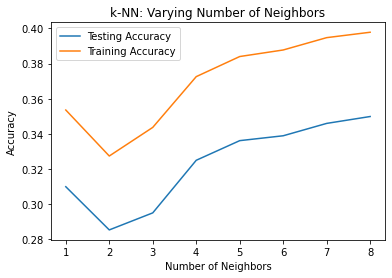

In [109]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn3 = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn3.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn3.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn3.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [111]:
# Import necessary modules

from sklearn.model_selection import GridSearchCV


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [115]:
crossval5 = cross_val_score(movie_knn,X,y,cv=5)
print(crossval5)
print(np.mean(crossval5))

[0.34528749 0.34374281 0.34587737 0.35015647 0.34850356]
0.34671353866043814


## Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression


In [118]:

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
lr =LogisticRegression()
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(lr,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(X_test)
r2 = logreg_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned Logistic c space: {}".format(logreg_cv.best_params_))
print("Tuned Logistic R squared: {}".format(r2))
print("Tuned Logistic MSE: {}".format(mse))

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.3488806498646116
Tuned Logistic c space: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic R squared: 0.34892422591255834
Tuned Logistic MSE: 1.4207391447795963


In [119]:
#decisiontree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

dtY_pred = decision_tree.predict(X_test)
dtY_pred
treescore = metrics.accuracy_score(y_test, dtY_pred)
treescore

0.38687375651113265

In [120]:
#random forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

rfy_pred=random_forest.predict(X_test)
forestscore = metrics.accuracy_score(y_test,rfy_pred)
forestscore

0.3892232631147459

In [127]:
Movierating_predictionmodel= pd.DataFrame({"Model":["Logistic","Decision Tree","Random Forest","KNN"],"Score":[r2,treescore,forestscore,knnscore]})
Movierating_predictionmodel

,Model,Score
0,Logistic,0.348924
1,Decision Tree,0.386874
2,Random Forest,0.389223
3,KNN,0.345947


__________________